In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

In [2]:
data=pd.read_csv('logpost_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.3193577704427004
             A         B         C        D
0   106.092218  1.789340  45.32733  0.31478
1   114.110142  1.738364  44.51848  0.07224
2    67.115742  1.652795  44.32612  0.01430
3    71.672233  1.583762  44.69770  0.00526
4    90.909547  1.739032  44.30242  0.01505
..         ...       ...       ...      ...
66   52.631167  1.572969  44.65970  0.01427
67  107.433101  1.874277  44.79900  0.00287
68   44.077425  1.467471  44.18964  0.16066
69   67.595756  1.500005  44.25669  0.01856
70   87.227714  1.710899  44.35819  0.03576

[71 rows x 4 columns]


pendiente b1  4.062050835255312
intercepción b0 is -103.08698225009233


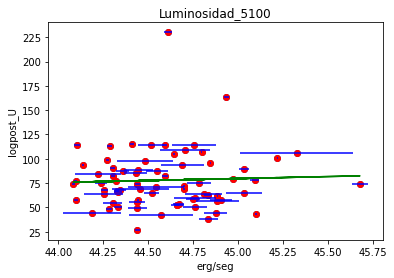

In [3]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('logpost_U')
plt.savefig("Luminosidad_5100_logpost_U.pdf")

In [4]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[ 4.06205084]
 [-0.08800315]
 [ 1.        ]]
Intercepción: [-103.08698225    5.68962801    0.        ]
Errorcuadratico medio : 300.6000238048621
Raiz del error cuadratico medio:  17.33782061866087
 Coeficiente de determinacion R2 :  0.33763439885338814


In [5]:
data=pd.read_csv('logpost_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.31698102669081274
             A         B         C        D
0   130.202316  1.949627  45.32733  0.31478
1   149.906770  2.918206  44.51848  0.07224
2   105.104500  1.736560  44.32612  0.01430
3    71.672233  1.583762  44.69770  0.00526
4   125.089477  2.485903  44.30242  0.01505
..         ...       ...       ...      ...
75   79.302025  2.318572  44.77507  0.07369
76  142.622398  2.060666  44.36424  0.00708
77  125.122405  1.571475  44.17580  0.04911
78  101.864754  1.809948  44.40151  0.00523
79  125.646016  1.640120  44.20654  0.02390

[80 rows x 4 columns]


pendiente b1  8.117742799468964
intercepción b0 is -241.993656615689


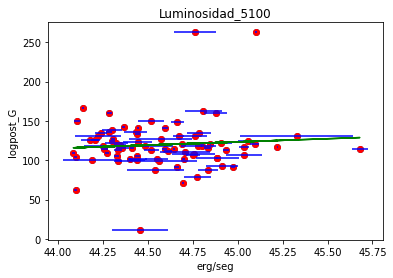

In [6]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('logpost_G')
plt.savefig("Luminosidad_5100_logpost_G.pdf")

In [7]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[8.1177428 ]
 [0.07295879]
 [1.        ]]
Intercepción: [-241.99365662   -1.1571232     0.        ]
Errorcuadratico medio : 343.88227361093567
Raiz del error cuadratico medio:  18.544063028660567
 Coeficiente de determinacion R2 :  0.33647385788608847


In [8]:
data=pd.read_csv('logpost_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.31399638095223986
             A         B         C        D
0   154.399355  1.829780  45.32733  0.31478
1   150.212161  2.298551  44.51848  0.07224
2   109.168604  1.641570  44.32612  0.01430
3   117.038446  1.661915  44.69770  0.00526
4   131.885924  1.702738  44.30242  0.01505
..         ...       ...       ...      ...
79   71.170227  2.307091  44.20654  0.02390
80  158.449949  1.782129  44.59746  0.00671
81  137.917820  1.547206  44.17015  0.06091
82  106.393878  2.398750  44.31297  0.01773
83  119.673020  2.125404  44.52867  0.01500

[84 rows x 4 columns]


pendiente b1  0.22115758750297637
intercepción b0 is 119.37159847355692


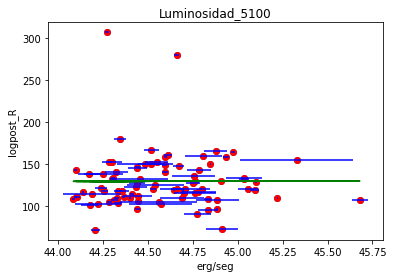

In [9]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('logpost_R')
plt.savefig("Luminosidad_5100_logpost_R.pdf")

In [10]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[ 0.22115759]
 [-0.11428747]
 [ 1.        ]]
Intercepción: [119.37159847   7.02148875   0.        ]
Errorcuadratico medio : 373.24529637493515
Raiz del error cuadratico medio:  19.31955735452899
 Coeficiente de determinacion R2 :  0.33646602797227015


In [11]:
data=pd.read_csv('logpost_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.31399638095223986
             A         B         C        D
0   141.824069  3.040497  45.32733  0.31478
1   151.780281  2.574591  44.51848  0.07224
2    92.614660  1.641891  44.32612  0.01430
3   110.824485  2.394953  44.69770  0.00526
4   112.537535  2.833369  44.30242  0.01505
..         ...       ...       ...      ...
79   79.807502  2.168904  44.20654  0.02390
80  144.270285  2.269053  44.59746  0.00671
81  114.551377  2.619182  44.17015  0.06091
82  109.263898  1.813485  44.31297  0.01773
83  111.509776  2.350403  44.52867  0.01500

[84 rows x 4 columns]


pendiente b1  0.24468234495211225
intercepción b0 is 110.80686404107115


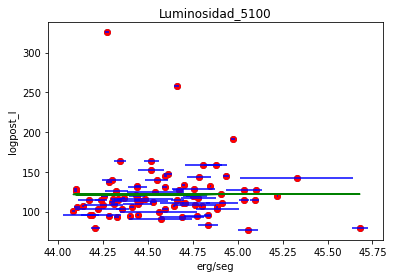

In [12]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('logpost_I')
plt.savefig("Luminosidad_5100_logpost_I.pdf")

In [13]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[0.24468234]
 [0.03165893]
 [1.        ]]
Intercepción: [110.80686404   0.68723795   0.        ]
Errorcuadratico medio : 384.2898408033282
Raiz del error cuadratico medio:  19.603311985563263
 Coeficiente de determinacion R2 :  0.33346114528943566


In [14]:
data=pd.read_csv('logpost_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.31698102669081274
             A         B         C        D
0   137.892281  1.687340  45.32733  0.31478
1   113.125078  1.561252  44.51848  0.07224
2    54.439427  1.585758  44.32612  0.01430
3    65.567099  1.576602  44.69770  0.00526
4   100.513633  1.802875  44.30242  0.01505
..         ...       ...       ...      ...
75   36.862623  1.729207  44.77507  0.07369
76  120.631785  1.557431  44.36424  0.00708
77  108.378965  1.522773  44.17580  0.04911
78   57.735250  1.645357  44.40151  0.00523
79   83.256750  1.383682  44.20654  0.02390

[80 rows x 4 columns]


pendiente b1  11.403203557967341
intercepción b0 is -422.8450921939754


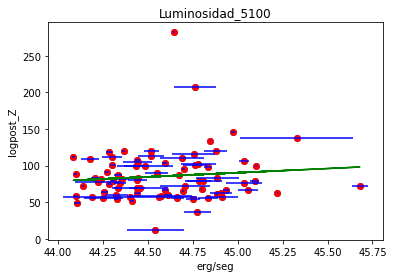

In [15]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('logpost_Z')
plt.savefig("Luminosidad_5100_logpost_Z.pdf")

In [16]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[11.40320356]
 [ 0.30069402]
 [ 1.        ]]
Intercepción: [-422.8450922   -11.68160256    0.        ]
Errorcuadratico medio : 421.0017266556251
Raiz del error cuadratico medio:  20.518326604663088
 Coeficiente de determinacion R2 :  0.3536714242395849
